[Github url](https://github.com/yoonho0922/SMU-DL-example)

In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mnist_train = dset.MNIST("", train=True, transform=transforms.ToTensor(),
                        target_transform=None, download=True)
mnist_test = dset.MNIST("", train=False, transform=transforms.ToTensor(),
                        target_transform=None, download=True)

mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label:  5


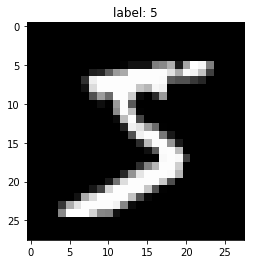

In [4]:
print "mnist_train 길이:", len(mnist_train)
print "mnist_test 길이:", len(mnist_test)

# 데이터 하나 형태
image, label = mnist_train.__getitem__(0) # 0번째 데이터
print"image data 형태:", image.size()
print"label: ", label

# 그리기
img = image.numpy() # image 타입을 numpy 로 변환 (1,28,28)
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

5
torch.Size([1, 28, 28])
5


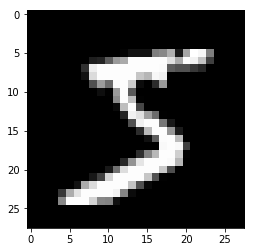

0


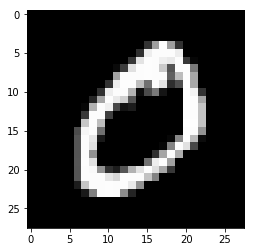

4


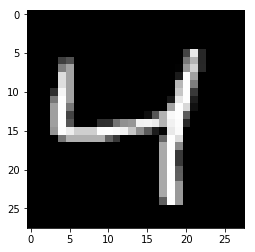

In [9]:
print(mnist_train[0][1])
print(mnist_train[0][0].size())

for i in range(3):
    img=mnist_train[i][0].numpy()
    print(mnist_train[i][1])
    plt.imshow(img[0], cmap='gray')
    plt.show()

torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


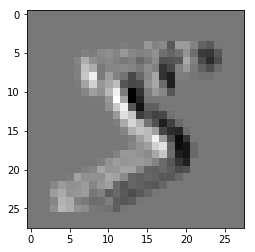

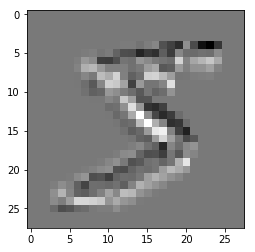

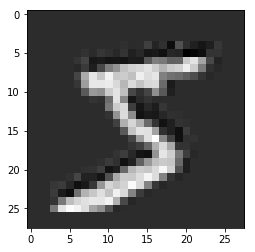

In [10]:
image, label = mnist_train[0]

image=image.view(-1, image.size()[0], image.size()[1], image.size()[2])
print(image.size())

print label

conv_layer=nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding=1)
output=conv_layer(Variable(image))
print(output.size())

for i in range(3):
    plt.imshow(output[0,i,:,:].data.numpy(), cmap='gray')
    plt.show()

## CNN 만들기

In [11]:
import numpy as np
import torch.optim as optim

batch_size = 16
learning_rate = 0.0002
num_epoch = 10

In [12]:
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size,
                                          shuffle=True, num_workers=2,
                                          drop_last=True)
test_loader = torch.utils.data.DataLoader(list(mnist_test)[:batch_size*100], batch_size=batch_size,
                                          shuffle=False, num_workers=2,
                                          drop_last=True)

In [13]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer=nn.Sequential(
            nn.Conv2d(1, 16, 5, padding=2),
            nn.ReLU(),
            
            nn.Conv2d(16, 32, 5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(32, 64, 5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.fc_layer=nn.Sequential(
            nn.Linear(64*7*7, 100),
            nn.ReLU(),
            nn.Linear(100,10)
        )
        
    def forward(self, x):
        out = self.layer(x)
        out = out.view(batch_size, -1)
        out = self.fc_layer(out)
        return out
    
model = CNN()

In [14]:
# 파라미터 체크
for param in model.parameters():
    print(param.shape)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([100, 3136])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [15]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [17]:
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader):
        x = Variable(image)
        y_ = Variable(label)
        
        optimizer.zero_grad()
        output=model.forward(x)
        loss = loss_func(output, y_)
        loss.backward()
        optimizer.step()
        
        if j%50==0:
            print(loss, j, i)

(tensor(2.3128, grad_fn=<NllLossBackward>), 0, 0)
(tensor(1.7807, grad_fn=<NllLossBackward>), 50, 0)
(tensor(0.2333, grad_fn=<NllLossBackward>), 0, 1)
(tensor(0.5543, grad_fn=<NllLossBackward>), 50, 1)
(tensor(0.7809, grad_fn=<NllLossBackward>), 0, 2)
(tensor(0.2957, grad_fn=<NllLossBackward>), 50, 2)
(tensor(0.2267, grad_fn=<NllLossBackward>), 0, 3)
(tensor(0.0932, grad_fn=<NllLossBackward>), 50, 3)
(tensor(0.1508, grad_fn=<NllLossBackward>), 0, 4)
(tensor(0.5132, grad_fn=<NllLossBackward>), 50, 4)
(tensor(0.0676, grad_fn=<NllLossBackward>), 0, 5)
(tensor(0.3307, grad_fn=<NllLossBackward>), 50, 5)
(tensor(0.0067, grad_fn=<NllLossBackward>), 0, 6)
(tensor(0.0340, grad_fn=<NllLossBackward>), 50, 6)
(tensor(0.0292, grad_fn=<NllLossBackward>), 0, 7)
(tensor(0.0715, grad_fn=<NllLossBackward>), 50, 7)
(tensor(0.0850, grad_fn=<NllLossBackward>), 0, 8)
(tensor(0.0083, grad_fn=<NllLossBackward>), 50, 8)
(tensor(0.1005, grad_fn=<NllLossBackward>), 0, 9)
(tensor(0.0108, grad_fn=<NllLossBackward>

In [18]:
torch.save(model, 'nets/mycnn_model_%d.pkl'%(num_epoch))

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type CNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [19]:
try:
    model=torch.load('nets/mycnn_model_10.pkl')
    print("model restored")
except:
    print("model not restored")

model restored


In [22]:
def ComputeAccr(dloader, imodel):
    correct=0
    total=0
    
    for j, [imgs, lables] in enumerate(dloader):
        img=Variable(imgs)
        lable=Variable(lables)
        
        output = imodel.forward(img)
        _, output_index = torch.max(output, 1)
        
        total += label.size(0)
        correct += (output_index == label).sum().float()
    print("Accuracy of Test Data: {}".format(100*correct/total))

In [23]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 9.5
